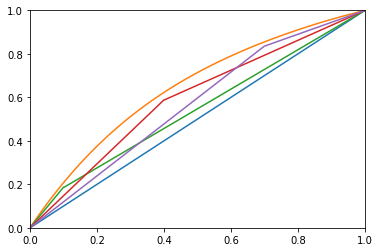

In [3]:
import matplotlib.pyplot as plt
x = []
y =[]
for i in range(0, 101):
    x.append(i / 100)
    y_i = - 0.4191 * (i/ 100) ** 4 + 1.5087 * (i/ 100) ** 3 - 2.3858 * (i/ 100) ** 2 + 2.2951 * (i/ 100) + 0.0005
    y.append(y_i)
plt.plot([0, 1], [0, 1])
plt.plot(x, y)
F = 1
# x_f = 0.555
for i in range(1, 10, 3):
    x_f = i / 10
    y_f = - 0.4191 * x_f ** 4 + 1.5087 * x_f ** 3 - 2.3858 * x_f ** 2 + 2.2951 * x_f + 0.0005
    x_1d = 0.999
    x_1w = 1 - x_1d
    D = F * (x_f - x_1w)/(x_1d - x_1w)
    f = F / D
    Rmin = (x_1d - y_f) / (y_f - x_f)
    R = Rmin * 1.3
    x_work = []
    y_work = []
    for j in range(1, 1000):
        x_work.append(j / 1000)
        if j / 1000 <= x_f:
            y_work_down = (R + f) / (R + 1) * j / 1000 - (1 - f) / (R + 1) * x_1w
            y_work.append(y_work_down)
        elif j / 1000 >= x_f:
            y_work_up = R / (R + 1) * j / 1000 + x_1d / (R + 1)
            y_work.append(y_work_up)
    plt.plot(x_work, y_work)
plt.axis([0, 1, 0, 1])
plt.show()


количество первого компонента в питании(доли): .55
Rmin = 1,2036
число тарело: 34


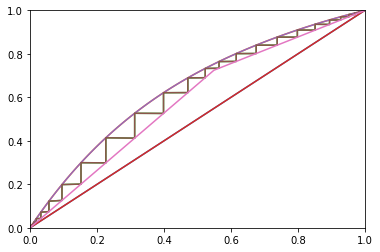

In [13]:
import matplotlib.pyplot as plt
x = []
y =[]
for i in range(0, 101):
    x.append(i / 100)
    y_i = - 0.4191 * (i/ 100) ** 4 + 1.5087 * (i/ 100) ** 3 - 2.3858 * (i/ 100) ** 2 + 2.2951 * (i/ 100) + 0.0005
    y.append(y_i)
plt.plot([0, 1], [0, 1])
plt.plot(x, y)



def x_eq(y):
    global mix
    mixture = mix
    if mixture == 'bt':
        yx = 0.8551 * y ** 4 - 0.8917 * y ** 3 + 0.6754 * y ** 2 + 0.3567 * y + 0.0022
    elif mixture == 'te':
        yx = 0.6986 * y ** 4 - 1.067 * y ** 3 + 1.028 * y ** 2 + 0.3335 * y + 0.0031
    elif mixture == 'ea':
        yx = - 2.815 * y ** 5 + 7.403 * y ** 4 - 5.5997 * y ** 3 + 1.9874 * y ** 2 + 0.0262 * y + 0.0024
    return yx


def y_eq(x):
    global mix
    mixture = mix
    if mixture == 'bt':
        xy = - 0.4191 * x ** 4 + 1.5087 * x ** 3 - 2.3858 * x ** 2 + 2.2951 * x + 0.0005
    elif mixture == 'te':
        xy = - 0.7937 * x ** 4 + 2.0119 * x ** 3 - 2.2674 * x ** 2 + 2.0401 * x + 0.0059
    elif mixture == 'ea':
        xy = 4.0475 * x ** 5 - 12.916 * x ** 4 + 16.378 * x ** 3 - 10.649 * x ** 2 + 4.1377 * x + 0.0052
    return xy


def ch_comma_to_dot(string):
    if string.find(',') > -1:
        number = float(string[:string.find(',')] + '.' + string[string.find(',') + 1:])
    else:
        number = float(string)
    return number


def ch_d_to_c(number):
    string = str(round(number, 4))
    answer = string[:string.find('.')] + ',' + string[string.find('.') + 1:]
    return answer


#mix = input('смесь: ')
mix = 'bt'
x_1_temp = input('количество первого компонента в питании(доли): ')
x_1 = ch_comma_to_dot(x_1_temp)
#x_1d_temp = input('количество первого компонента в дистиллате(доли): ')
#x_1d = ch_comma_to_dot(x_1d_temp)
x_1d = 0.999
#F_temp = input('питание кмоль/ч: ')
#F = ch_comma_to_dot(F_temp)
F = 0.4
x_1w = 1 - x_1d
D = F * (x_1 - x_1w)/(x_1d - x_1w)
f = F / D

Rmin = (x_1d - y_eq(x_1)) / (y_eq(x_1) - x_1)
R = Rmin * 1.3
y = x_1d
x = x_1d
x_work = [x]
y_work = [y]
N = 0
x_pr = 0
x_last = 0
while x > x_1w:
    x = x_eq(y)
    x_work.append(x)
    y_work.append(y_eq(x))
    x_last = x
    if round(x_last, 5) == round(x_pr, 5):
        #x_work.pop()
        break
    if x > x_1:
        y_work_up = R / (R + 1) * x + x_1d / (R + 1)
        y = y_work_up
        x_work.append(x)
        y_work.append(y)
    elif x < x_1:
        y_work_down = (R + f) / (R + 1) * x - (1 - f) / (R + 1) * x_1w
        y = y_work_down
        x_work.append(x)
        y_work.append(y)
    x_pr = x_last
    N +=1
#print(len(x_work), len(y_work))
plt.plot(x_work, y_work)
#print(*(round(x, 4) for x in x_work))
#print(*(round(y, 4) for y in y_work))
print('Rmin =', ch_d_to_c(Rmin))
print('число тарело:', N)

x_work_line = []
y_work_line = []
for j in range(int(x_1w * 1000), int(x_1d * 1000 + 1)):
    x_work_line.append(j / 1000)
    if j / 1000 <= x_1:
        y_work_down = (R + f) / (R + 1) * j / 1000 - (1 - f) / (R + 1) * x_1w
        y_work_line.append(y_work_down)
    elif j / 1000 >= x_1:
        y_work_up = R / (R + 1) * j / 1000 + x_1d / (R + 1)
        y_work_line.append(y_work_up)
plt.plot(x_work_line, y_work_line)
plt.axis([0, 1, 0, 1])

plt.show()